In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set(color_codes=True)

In [9]:
root_dir = os.path.join(os.getcwd(), '..')
data_dir = os.path.join(root_dir, 'data')
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [10]:
train.shape, test.shape

((3865, 80), (890, 79))

In [11]:
f'target => {[col for col in train.columns if col not in test.columns][0]}'

'target => y'

In [12]:
train.describe()['y']

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64

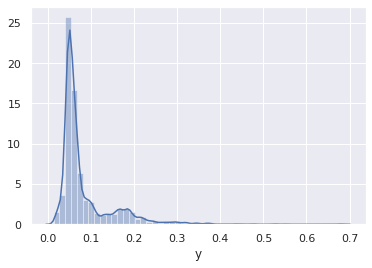

In [13]:
sns.distplot(train['y'])

In [14]:
train.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [15]:
# galaxies with low existence expectancy index below 0.7
gl_train = (train['existence expectancy index'] <= 0.7).sum()
gl_test = (test['existence expectancy index'] <= 0.7).sum()
print('nbr in train data: ', gl_train, 'represents', gl_train/len(train))
print('nbr in test data: ', gl_test, 'represents',gl_test/len(test))

nbr in train data:  677 represents 0.17516170763260025
nbr in test data:  66 represents 0.07415730337078652


In [16]:
train.columns

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expect

In [17]:
train[train['galaxy']=='Tucana Dwarf']

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247
188,991020,Tucana Dwarf,1.047298,84.764154,89090.567430,1.192736,13.358028,13.053707,0.996431,0.840777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155323
411,992016,Tucana Dwarf,0.948264,81.625488,84904.991248,1.295898,14.614785,12.270893,0.914828,0.917639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155407
671,993012,Tucana Dwarf,0.902668,87.874019,71730.095754,1.252474,12.575053,12.348018,0.982590,0.794793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155942
741,994009,Tucana Dwarf,0.952121,85.458325,80812.534460,1.195646,15.683565,12.210135,0.989668,0.904178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156428
1036,995006,Tucana Dwarf,1.088402,87.492786,80162.560696,1.126939,13.971509,11.465348,0.928586,0.945426,...,NaN,NaN,NaN,NaN,NaN,NaN,5.821994,NaN,0.486543,0.156904
1166,996004,Tucana Dwarf,1.043402,81.159627,83181.385788,1.184200,14.022761,10.825229,0.980363,0.775362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159677
1359,997002,Tucana Dwarf,1.025836,87.439019,100275.142288,1.105039,15.073819,12.921432,1.041252,0.907313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160758
1618,998001,Tucana Dwarf,1.019520,89.033353,91514.576466,1.165481,16.121923,11.855654,0.948309,0.924099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162026
1667,999000,Tucana Dwarf,0.962099,87.889748,89797.163881,1.124551,13.347643,11.661893,1.025234,0.946365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164336


In [18]:
# galaxies_train != galaxies_test
[galaxy for galaxy in test['galaxy'] if galaxy in train['galaxy']]

[]